In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\sh_ART\Data\anomaly-free.csv",sep=";")

In [3]:
df=df[:500]

In [4]:
df

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
0,2020-02-08 13:30:47,0.206030,0.277924,1.810190,0.382638,90.1740,26.7760,228.208,121.664
1,2020-02-08 13:30:48,0.204366,0.275727,2.663170,-0.273216,90.2836,26.7760,227.245,122.000
2,2020-02-08 13:30:49,0.206103,0.278526,2.637580,0.382638,89.8666,26.7821,237.872,122.000
3,2020-02-08 13:30:51,0.204775,0.276948,2.328510,0.382638,90.2192,26.7773,230.422,121.338
4,2020-02-08 13:30:52,0.206052,0.278141,2.534220,0.382638,90.1449,26.7773,219.454,121.664
...,...,...,...,...,...,...,...,...,...
495,2020-02-08 13:39:35,0.201955,0.277152,2.728910,-0.273216,91.0215,27.0147,239.606,122.000
496,2020-02-08 13:39:36,0.202356,0.277019,2.785190,0.054711,90.9836,27.0036,224.644,122.665
497,2020-02-08 13:39:37,0.200719,0.276803,0.905453,0.054711,91.0322,27.0036,215.423,122.337
498,2020-02-08 13:39:38,0.203281,0.276931,2.553780,-0.273216,91.1285,27.0016,237.227,121.337


In [5]:
df_anomaly = df[["Temperature", "Accelerometer1RMS"]]

In [6]:
df_anomaly.describe()

,Temperature,Accelerometer1RMS
count,500.000000,500.000000
mean,90.740696,0.202875
std,0.490121,0.001441
min,89.572300,0.198511
25%,90.416100,0.201922
50%,90.782450,0.202950
75%,91.103250,0.203773
max,91.724900,0.208436


### Поиск коллективных аномалий (выбросов) в  2-мерных данных с помощью метода решеток

In [7]:
from sklearn.neighbors import LocalOutlierFactor

# Создание модели LOF с использованием решетки
model = LocalOutlierFactor(contamination='auto', novelty=True)

# Обучение модели на данных
model.fit(df_anomaly)

# Предсказание аномалий
anomaly_scores = model.decision_function(df_anomaly)
anomaly_labels = model.predict(df_anomaly)

# Вывод результатов
for i in range(len(df_anomaly)):
    print("Data point:", df_anomaly.iloc[i])
    print("Anomaly score:", anomaly_scores[i])
    print("Anomaly label:", anomaly_labels[i])
    print("-------------")

Data point: Temperature          90.17400
Accelerometer1RMS     0.20603
Name: 0, dtype: float64
Anomaly score: 0.4872404716325862
Anomaly label: 1
-------------
Data point: Temperature          90.283600
Accelerometer1RMS     0.204366
Name: 1, dtype: float64
Anomaly score: 0.5306738761095993
Anomaly label: 1
-------------
Data point: Temperature          89.866600
Accelerometer1RMS     0.206103
Name: 2, dtype: float64
Anomaly score: 0.536155130924406
Anomaly label: 1
-------------
Data point: Temperature          90.219200
Accelerometer1RMS     0.204775
Name: 3, dtype: float64
Anomaly score: 0.43016460906991827
Anomaly label: 1
-------------
Data point: Temperature          90.144900
Accelerometer1RMS     0.206052
Name: 4, dtype: float64
Anomaly score: 0.46325037257474677
Anomaly label: 1
-------------
Data point: Temperature          90.270300
Accelerometer1RMS     0.204336
Name: 5, dtype: float64
Anomaly score: 0.529080944131907
Anomaly label: 1
-------------
Data point: Temperature 

C:\Users\sh_ART\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\sh_ART\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


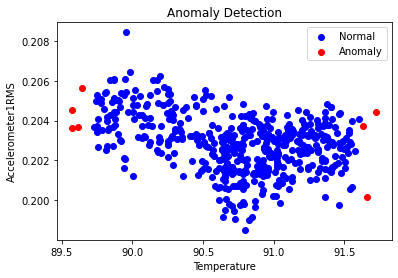

In [8]:
import matplotlib.pyplot as plt

# Разделение данных на аномалии и нормальные точки
anomaly_points = df_anomaly[anomaly_labels == -1]
normal_points = df_anomaly[anomaly_labels == 1]

# Построение графика
plt.scatter(normal_points['Temperature'], normal_points['Accelerometer1RMS'], c='blue', label='Normal')
plt.scatter(anomaly_points['Temperature'], anomaly_points['Accelerometer1RMS'], c='red', label='Anomaly')

plt.xlabel('Temperature')
plt.ylabel('Accelerometer1RMS')
plt.legend()
plt.title('Anomaly Detection')

plt.show()

In [9]:
anomaly_points

,Temperature,Accelerometer1RMS
28,89.5723,0.203615
61,89.5755,0.204547
70,89.6118,0.203668
71,89.6402,0.205614
256,91.7249,0.204443
259,91.6582,0.200139
262,91.6300,0.203735


### Поиск коллективных аномалий (выбросов) в  2-мерных данных с помощью метод вложенных циклов

In [10]:
# Параметры метода вложенных циклов
epsilon = 0.1  # Пороговое значение для определения аномалий
min_pts = 5  # Минимальное количество точек в окрестности

# Список для хранения аномальных точек
anomaly_points = []

# Проход по каждой точке данных
for i in range(len(df_anomaly)):
    point = df_anomaly.iloc[i]
    neighbors = 0
    
    # Поиск соседей текущей точки
    for j in range(len(df_anomaly)):
        if i == j:
            continue
        
        other_point = df_anomaly.iloc[j]
        distance = ((point['Temperature'] - other_point['Temperature']) ** 2 +
                    (point['Accelerometer1RMS'] - other_point['Accelerometer1RMS']) ** 2) ** 0.5
        
        if distance <= epsilon:
            neighbors += 1
    
    # Проверка, является ли текущая точка аномальной
    if neighbors < min_pts:
        anomaly_points.append(point)

# Вывод аномальных точек
for anomaly_point in anomaly_points:
    print(anomaly_point)

Temperature          89.572300
Accelerometer1RMS     0.203615
Name: 28, dtype: float64
Temperature          89.575500
Accelerometer1RMS     0.204547
Name: 61, dtype: float64
Temperature          89.611800
Accelerometer1RMS     0.203668
Name: 70, dtype: float64
Temperature          89.640200
Accelerometer1RMS     0.205614
Name: 71, dtype: float64
Temperature          91.724900
Accelerometer1RMS     0.204443
Name: 256, dtype: float64
Temperature          91.658200
Accelerometer1RMS     0.200139
Name: 259, dtype: float64


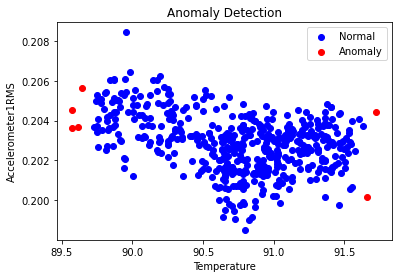

In [11]:
import matplotlib.pyplot as plt

# Создание списков для хранения координат аномальных и нормальных точек
anomaly_x = []
anomaly_y = []
normal_x = []
normal_y = []

# Проход по каждой точке данных
for i in range(len(df_anomaly)):
    point = df_anomaly.iloc[i]
    neighbors = 0
    
    # Поиск соседей текущей точки
    for j in range(len(df_anomaly)):
        if i == j:
            continue
        
        other_point = df_anomaly.iloc[j]
        distance = ((point['Temperature'] - other_point['Temperature']) ** 2 +
                    (point['Accelerometer1RMS'] - other_point['Accelerometer1RMS']) ** 2) ** 0.5
        
        if distance <= epsilon:
            neighbors += 1
    
    # Добавление точки в соответствующий список
    if neighbors < min_pts:
        anomaly_x.append(point['Temperature'])
        anomaly_y.append(point['Accelerometer1RMS'])
    else:
        normal_x.append(point['Temperature'])
        normal_y.append(point['Accelerometer1RMS'])

# Построение графика
plt.scatter(normal_x, normal_y, c='blue', label='Normal')
plt.scatter(anomaly_x, anomaly_y, c='red', label='Anomaly')

plt.xlabel('Temperature')
plt.ylabel('Accelerometer1RMS')
plt.legend()
plt.title('Anomaly Detection')

plt.show()

In [12]:
print("Anomaly Temperature:",anomaly_x)
print("Anomaly Accelerometer1RMS:", anomaly_y)

Anomaly Temperature: [89.5723, 89.5755, 89.6118, 89.6402, 91.7249, 91.6582]
Anomaly Accelerometer1RMS: [0.203615, 0.204547, 0.203668, 0.205614, 0.204443, 0.200139]


### Поиск коллективных аномалий (выбросов) в  2-мерных данных с помощью метода кластеризации

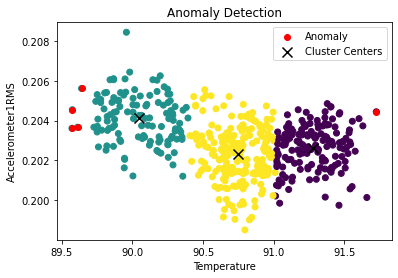

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Параметры алгоритма K-means
num_clusters = 3

# Создание модели K-means
kmeans = KMeans(n_clusters=num_clusters)

# Обучение модели на данных
kmeans.fit(df_anomaly)

# Получение меток кластеров
cluster_labels = kmeans.labels_

# Получение центроидов кластеров
cluster_centers = kmeans.cluster_centers_

# Расчет расстояний от каждой точки до центроидов
distances = kmeans.transform(df_anomaly)

# Вычисление средних расстояний для каждого кластера
cluster_avg_distances = distances.min(axis=1)

# Определение выбросов на основе среднего расстояния
outlier_threshold = 0.4  # Пороговое значение для определения выбросов
outlier_mask = cluster_avg_distances > outlier_threshold

# Построение графика
plt.scatter(df_anomaly['Temperature'], df_anomaly['Accelerometer1RMS'], c=cluster_labels, cmap='viridis')

# Выделение выбросов другим цветом
plt.scatter(df_anomaly['Temperature'][outlier_mask], df_anomaly['Accelerometer1RMS'][outlier_mask], c='red', label='Anomaly')

# Добавление маркеров центроидов кластеров
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='black', label='Cluster Centers')

plt.xlabel('Temperature')
plt.ylabel('Accelerometer1RMS')
plt.title('Anomaly Detection')

plt.legend()
plt.show()

### Поиск коллективных аномалий (выбросов) во временном ряде на основе понятия диссонанса

In [14]:
import random

In [15]:
taxi_df = pd.read_csv(r'C:\Users\sh_ART\Data\taxi.csv', index_col = 0)

In [16]:
random_list=[]

In [17]:
for i in range(500):
    random_list.append(random.choice(taxi_df.index))

In [18]:
taxi_df=taxi_df.loc[random_list]

In [19]:
df_date=taxi_df["timestamp"]

In [20]:
df_date

8652    2014-12-28 06:00:00
4069    2014-09-23 18:30:00
9382    2015-01-12 11:00:00
5       2014-07-01 02:30:00
6153    2014-11-06 04:30:00
               ...         
9582    2015-01-16 15:00:00
3321    2014-09-08 04:30:00
9116    2015-01-06 22:00:00
2751    2014-08-27 07:30:00
4293    2014-09-28 10:30:00
Name: timestamp, Length: 500, dtype: object

In [21]:
# Convert the column to datetime
df_date = pd.to_datetime(df_date)

# Extract the date part
df_date = df_date.dt.date

# Output the result
print(df_date)

8652    2014-12-28
4069    2014-09-23
9382    2015-01-12
5       2014-07-01
6153    2014-11-06
           ...    
9582    2015-01-16
3321    2014-09-08
9116    2015-01-06
2751    2014-08-27
4293    2014-09-28
Name: timestamp, Length: 500, dtype: object


In [22]:
# Calculate the time differences in seconds
date_diff_seconds = np.diff(df_date).astype('timedelta64[s]').astype(int)

# Calculate the standard deviation
std_dev = np.std(date_diff_seconds)

# Define the outlier threshold
outlier_threshold = np.mean(date_diff_seconds) + 2 * std_dev

# Find the outliers
outliers = df_date[1:][date_diff_seconds > outlier_threshold]

# Output the results
print("Outliers:")
print(outliers)

Outliers:
9396     2015-01-12
9499     2015-01-14
10253    2015-01-30
9131     2015-01-07
9763     2015-01-20
10000    2015-01-25
10179    2015-01-29
9815     2015-01-21
Name: timestamp, dtype: object


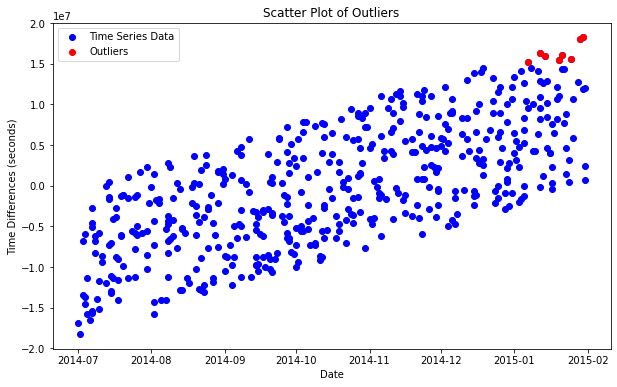

Outliers:
9396     2015-01-12
9499     2015-01-14
10253    2015-01-30
9131     2015-01-07
9763     2015-01-20
10000    2015-01-25
10179    2015-01-29
9815     2015-01-21
Name: timestamp, dtype: object


In [23]:
# Plot the scatter plot of outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_date[1:], date_diff_seconds, color='blue', label='Time Series Data')
plt.scatter(outliers, date_diff_seconds[date_diff_seconds > outlier_threshold], color='red', label='Outliers')

plt.xlabel('Date')
plt.ylabel('Time Differences (seconds)')
plt.title('Scatter Plot of Outliers')
plt.legend()
plt.show()

# Output the results
print("Outliers:")
print(outliers)